In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("/home/walaa-shaaban/Documents/project/bank-additional-full.csv", sep=';')
df.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20681,33,technician,single,university.degree,unknown,unknown,unknown,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


# Preprocessing Data & EDA

In [16]:
df.drop_duplicates(inplace=True)

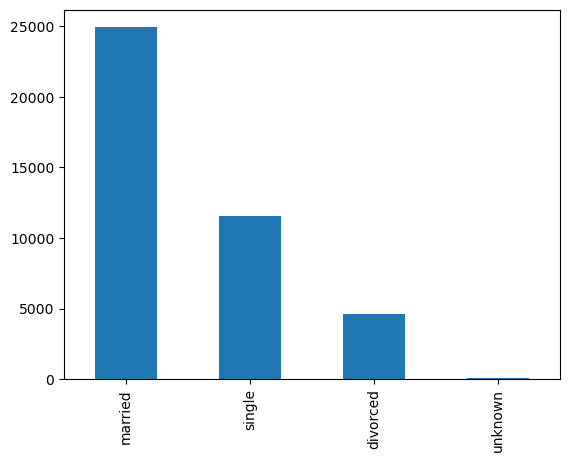

In [17]:
df['marital'].value_counts().plot(kind='bar');

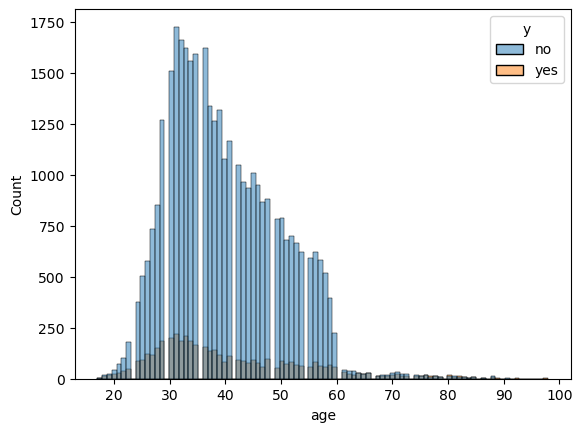

In [18]:
sns.histplot(x ='age', hue='y', data = df);

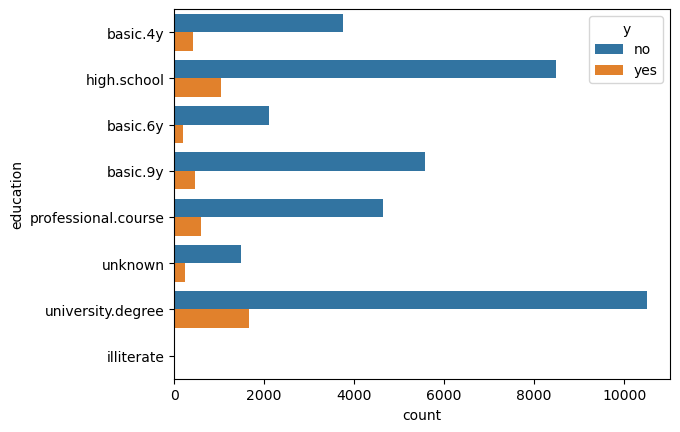

In [19]:
sns.countplot(y='education', hue='y', data=df);

In [20]:
color = sns.color_palette()[0]

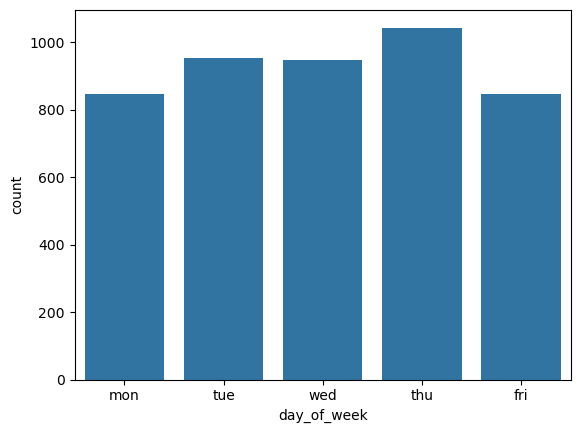

In [21]:
sns.countplot(x='day_of_week', data=df[df['y']=='yes'], color=color);

In [22]:
df = pd.get_dummies(df)

In [23]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [24]:
df.drop(['y_no'], axis=1, inplace=True)
df.rename(columns={"y_yes": "subscribed"}, inplace=True)

In [25]:
df.shape

(41176, 64)

In [26]:
columns = df.columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  job_admin.                     41176 non-null  uint8  
 11  job_blue-collar                41176 non-null  uint8  
 12  job_entrepreneur               41176 non-null 

In [28]:
df = MinMaxScaler().fit_transform(df)

In [29]:
df = pd.DataFrame(data=df, columns=columns)

In [30]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X = df.drop('subscribed', axis=1)
y = df['subscribed']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build Model 

In [33]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=30)


Epoch 1/30
1030/1030 [==============================] - 2s 1ms/step - loss: 0.2767 - accuracy: 0.8968
Epoch 2/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2344 - accuracy: 0.9044
Epoch 3/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2157 - accuracy: 0.9093
Epoch 4/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2081 - accuracy: 0.9108
Epoch 5/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2049 - accuracy: 0.9113
Epoch 6/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2018 - accuracy: 0.9133
Epoch 7/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.1988 - accuracy: 0.9138
Epoch 8/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.1960 - accuracy: 0.9138
Epoch 9/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.1929 - accuracy: 0.9142
Epoch 10/30
1030/1030 [==============================] - 1s 1ms/step - loss: 0.189

In [35]:
loss_and_metrics = model.evaluate(X_test, y_test)
print("loss is ", loss_and_metrics[0])
print("metrics is ", loss_and_metrics[1])

258/258 [==============================] - 0s 1ms/step - loss: 0.1843 - accuracy: 0.9127
loss is  0.1842605471611023
metrics is  0.912700355052948


In [36]:
y_pred = model.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

258/258 [==============================] - 0s 899us/step


In [37]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[7021,  275],
       [ 444,  496]])

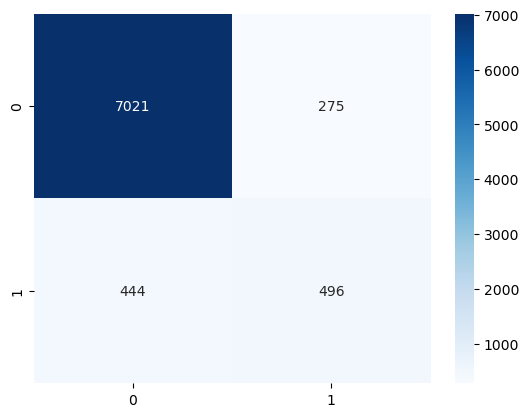

In [38]:
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues');
